# Telco Customer Churn  

In [1]:
# import packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

The dataset can be downloaded 
from https://www.kaggle.com/blastchar/telco-customer-churn

## Data Exploration

In [2]:
## import data 
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.set_index("customerID", inplace=True)

In [3]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Types

In this section we check and plausibalize the data types of the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


"TotalCharges" should be of type float as "MonthlyCharges". We will correct the data type before we proceed.


In [5]:
#Convert "TotalCharges" to numeric. 
#There are empty fields which are identified as type string by python. They need to be replaced by "None" first
data.TotalCharges.replace(" ", None, inplace=True)
data.TotalCharges = pd.to_numeric(data.TotalCharges)
data.TotalCharges.dtype

dtype('float64')

In [6]:
col_names = data.columns

In [7]:

col_categorical = [ 'gender'
                   ,'SeniorCitizen'
                   ,'Partner'
                   ,'Dependents' 
                   ,'PhoneService'
                   ,'MultipleLines' 
                   ,'InternetService' 
                   ,'OnlineSecurity' 
                   ,'OnlineBackup' 
                   ,'DeviceProtection' 
                   ,'TechSupport' 
                   ,'StreamingTV' 
                   ,'StreamingMovies' 
                   ,'Contract' 
                   ,'PaperlessBilling' 
                   ,'PaymentMethod'
                  ]


col_numerical = [ 'tenure'
                 ,'MonthlyCharges' 
                 , 'TotalCharges']

col_target = ['Churn']

### Missing values

In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
(data == " ").sum()

/anaconda3/envs/kaggle_customer_churn/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values or empty strings in the dataet.

## Train test split

In [10]:
X = data[col_categorical+col_numerical]
y = data[col_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (4718, 19)
X_test: (2325, 19)
y_train: (4718, 1)
y_test: (2325, 1)


In [12]:
y_train['Churn'].value_counts()

No     3477
Yes    1241
Name: Churn, dtype: int64

In [13]:
y_test['Churn'].value_counts()

No     1697
Yes     628
Name: Churn, dtype: int64

### Downsample

There are more customers that did not churn than customers who did churn. We downsample the trainging data to prevent a bias in the classification modeling.

## Descriptive Statistics

### Categorical Variables

In [14]:
def plot_counts(columns, data, group=None): #col =list of categorigal name
	n=2
	m=math.ceil(len(columns)/n)
	fig, axes=plt.subplots(m,n, figsize=(15,20))
	axes=axes.flatten()

	for i, col in enumerate(columns):
		sns.countplot(x=col, data=data, hue=group, palette="Blues",  ax=axes[i])
		fig.tight_layout()

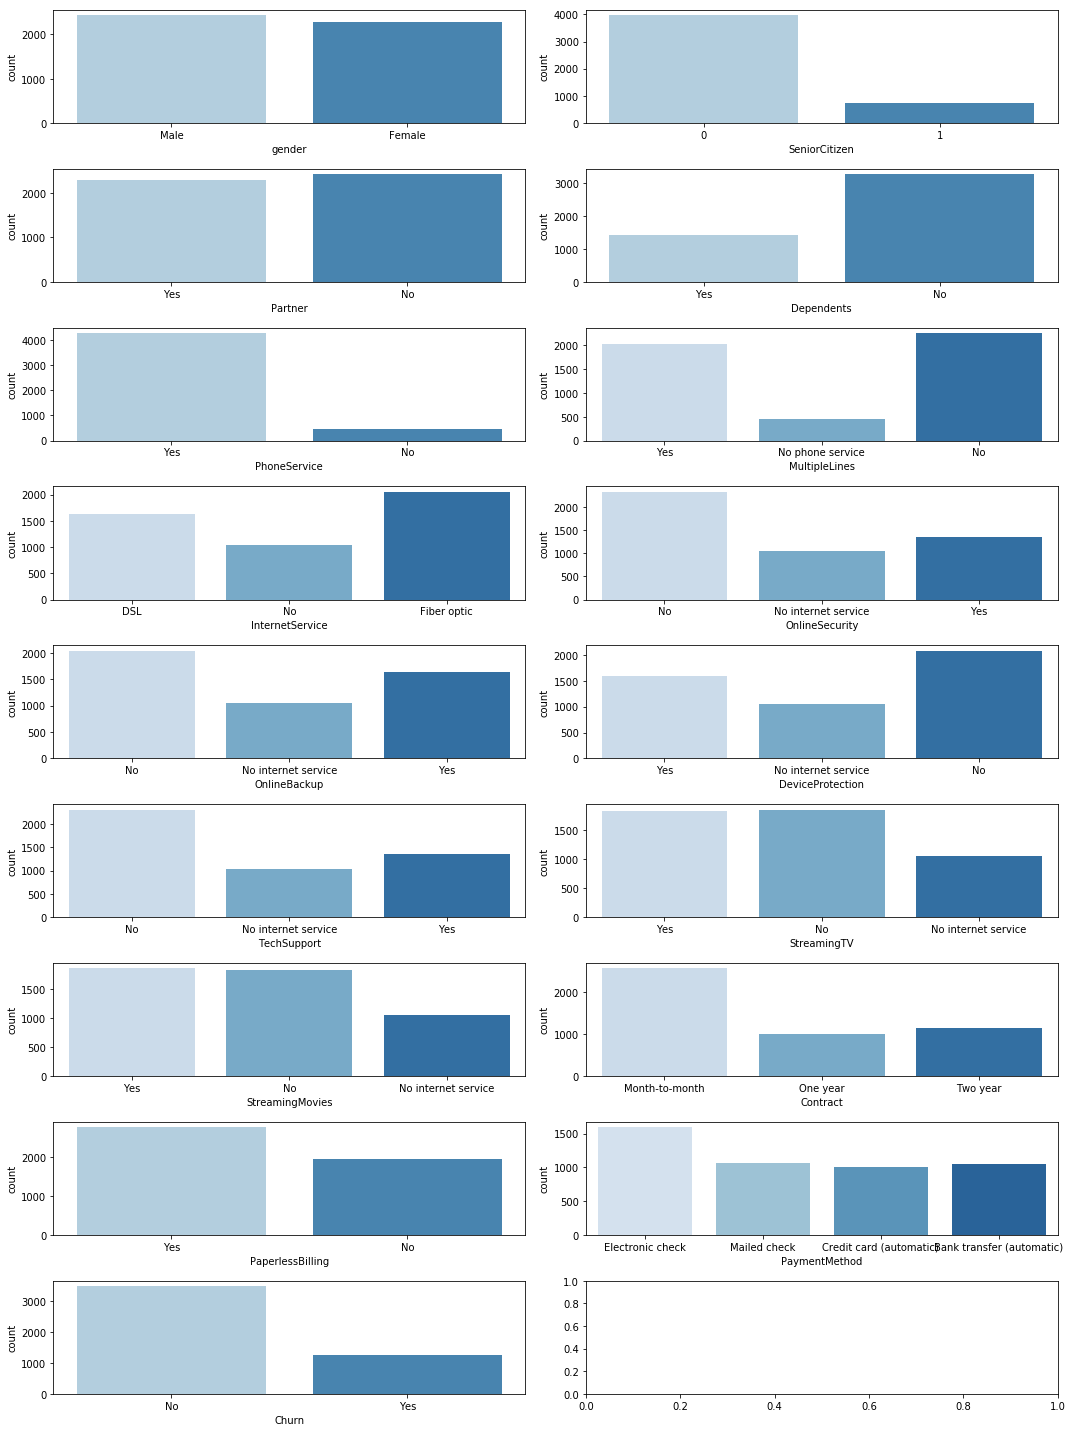

In [15]:
plot_counts(col_categorical + col_target , X_train.join(y_train))

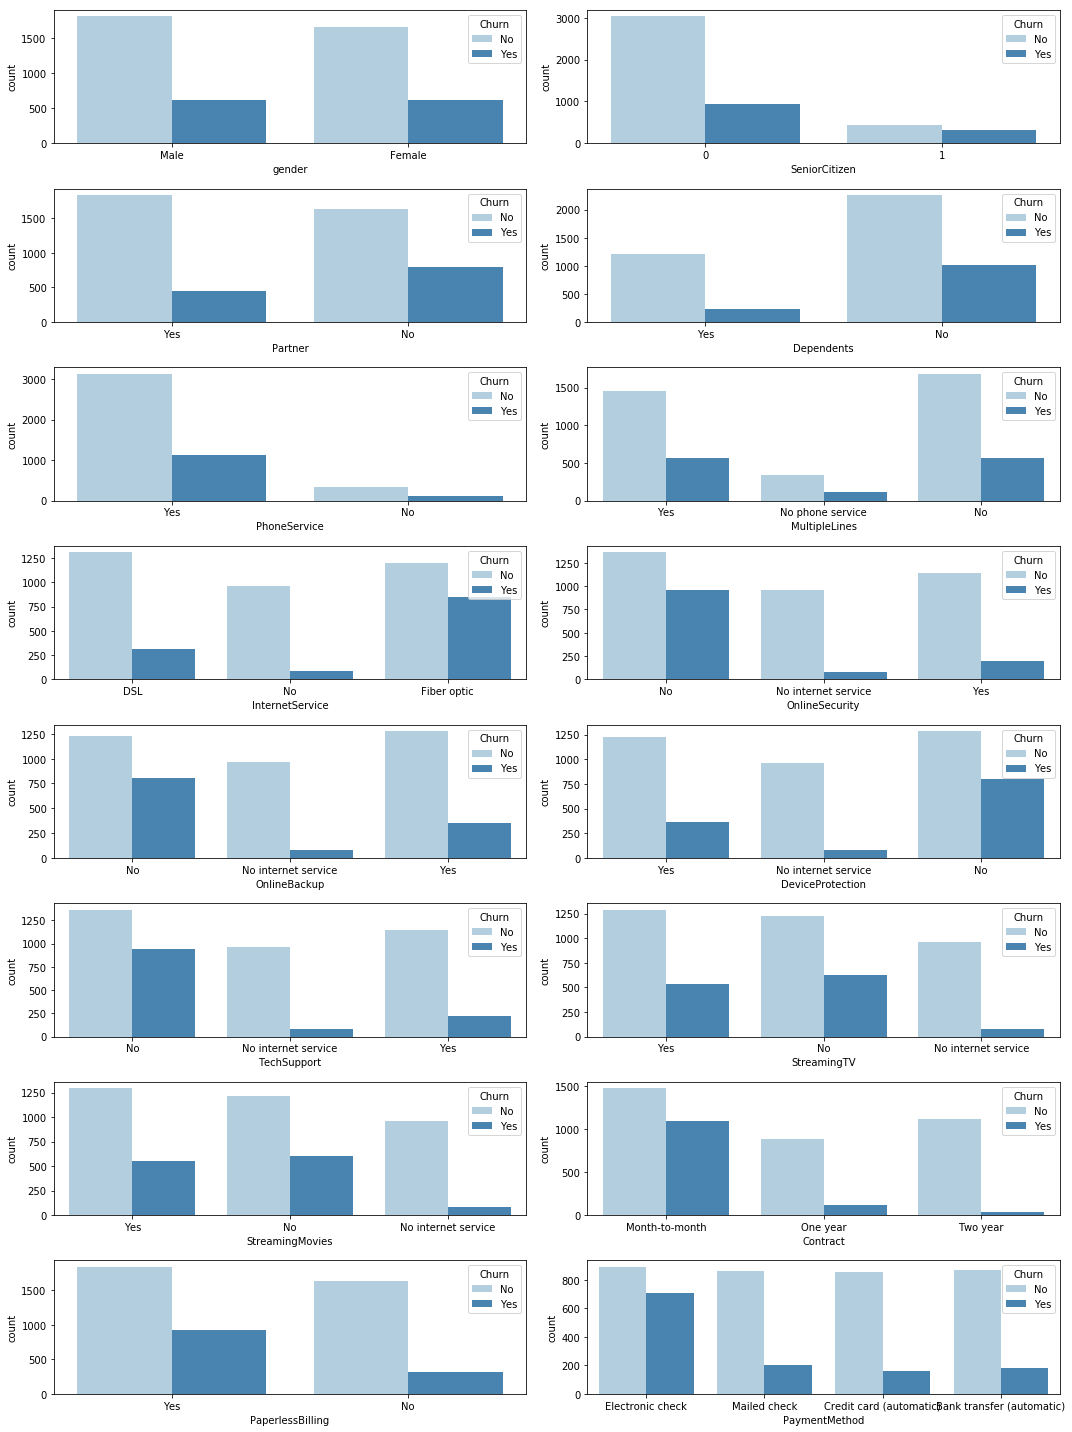

In [16]:
plot_counts(col_categorical, X_train.join(y_train), group='Churn')

### Numerical Variables

In [17]:
def plot_hist_sns(columns, data, color='firebrick'):
    n = 3
    m = math.ceil(len(columns)/n)
    fig, axes =plt.subplots(m,n, figsize=(15,5))
    axes = axes.flatten()

    for i,col in enumerate(columns):
        sns.distplot(data[col], kde=False, ax=axes[i], color=color);
        fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20a54860>,
      dtype=object)

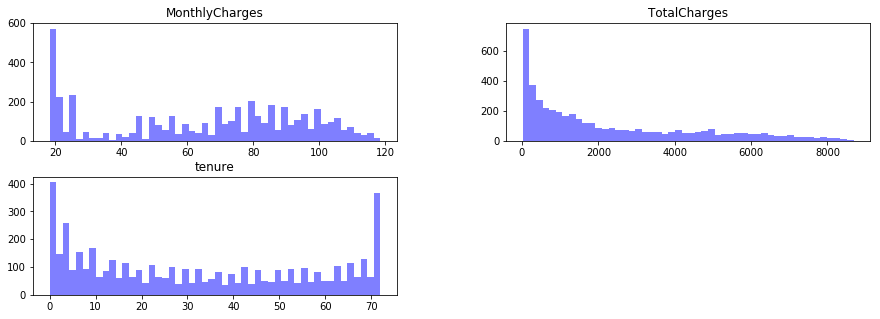

In [18]:
X_train.hist(column=col_numerical, bins=50, figsize=(15,5), color='blue', alpha=0.5, grid=False)

In [19]:
#plot the distribution of numerical features by label (label must be binary)
#column=the list of numerical var
#target = name of the target variable
def plot_distribution_class(data, target,  column=None,  bins=50, color1="firebrick", color2="blue", alpha1=0.5, alpha2=0.3):
	subset0=data[data[target]==0]
	subset1=data[data[target]==1]

	p=len(column)
	n=math.ceil(p/3)
	fig, ax=plt.subplots(n,3, figsize=(15,5))
	ax=ax.ravel()
	
	for i in range(p):
		ax[i].hist(subset0[column[i]], bins=bins, color=color1, alpha=alpha1)
		ax[i].hist(subset1[column[i]], bins=bins, color=color2, alpha=alpha2)
		ax[i].set_title(column[i], fontsize=9)
		ax[i].set_yticks(())

	ax[0].legend(['0','1'],loc='best',fontsize=8)
	plt.tight_layout()
	plt.show()

In [20]:
y_train.Churn.replace(['Yes', 'No'], [1,0], inplace=True)

/anaconda3/envs/kaggle_customer_churn/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


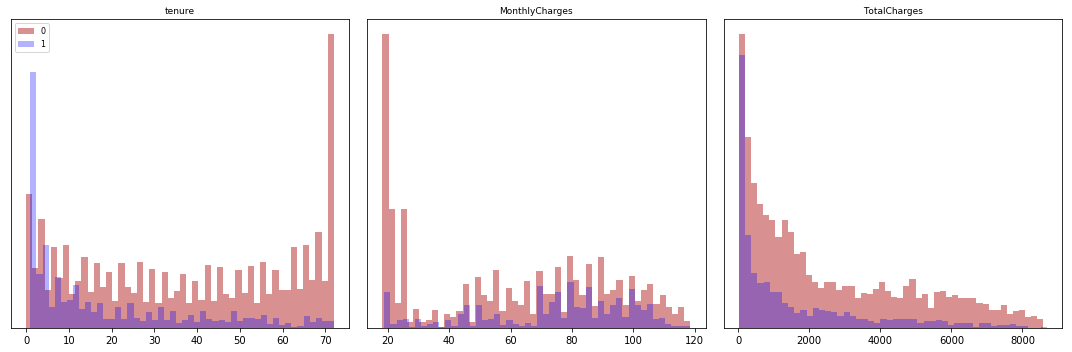

In [21]:
plot_distribution_class(data=X_train.join(y_train), target="Churn", column=col_numerical)

We can see, that customers with a short tenure tend to churn more often than cutomers with a long tenure.

### Correlation

<strong> Numerical variables: pearson correlation </strong>

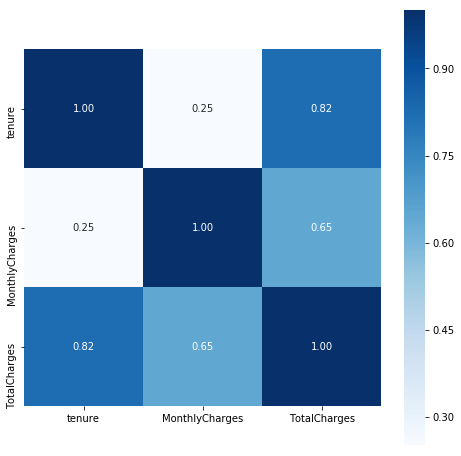

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train[col_numerical].corr(), cmap="Blues", square=True, annot=True, fmt = ".2f")
plt.show()

"Tenure" and "TotalCharges" as well as "MonthlyCharges" and "TotalCharges" are highly correlated. This makes sense, since the longer a person is customer the more he paid in total. Since we can compute or at least approximate "TotalCharges" from "Tenure" and "MonthlyCharges" (TotalCharges = MonthlyCharges* 12 * Tenure) we should exclude "TotalCharges" from the training set.

<strong>Categorical variables : Cramer's V  </strong>

The more close to 1, the more the variables are correlated. I use a function from "toward's data science".
<a href="https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9">click here </a>

In [23]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [24]:
df_cramer=X_train[col_categorical].apply(lambda x: X_train[col_categorical].apply(lambda y: cramers_v(x, y)))

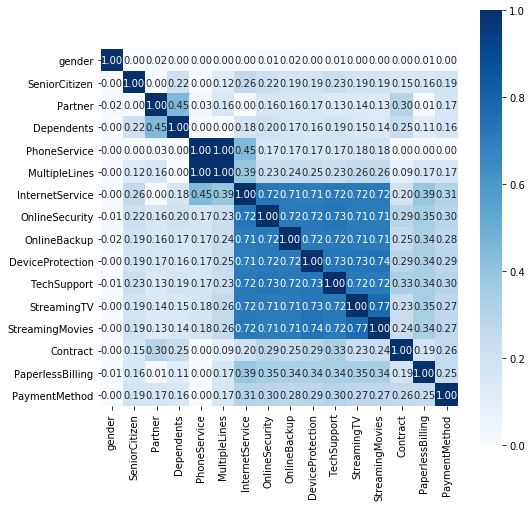

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df_cramer, cmap="Blues", square=True, annot=True, fmt = ".2f")
plt.show()

Take a look only at the variables with Cramer's V >0.4:

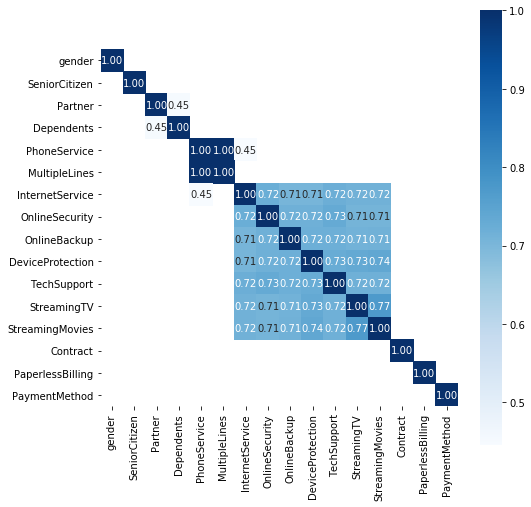

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df_cramer[df_cramer.abs()>0.4], cmap="Blues", square=True, annot=True, fmt = ".2f")
plt.show()

* Correlation "Internet Service" and "PhoneService": 

In [27]:
((X_train.OnlineSecurity == 'Yes') & (X_train.OnlineBackup == "No")).sum()

591

In [28]:
X_train.OnlineSecurity.value_counts()

No                     2326
Yes                    1348
No internet service    1044
Name: OnlineSecurity, dtype: int64

In [29]:
X_train.OnlineBackup.value_counts()

No                     2040
Yes                    1634
No internet service    1044
Name: OnlineBackup, dtype: int64

In [30]:
pd.crosstab(X_train.OnlineSecurity, X_train.OnlineBackup)

OnlineBackup,No,No internet service,Yes
OnlineSecurity,,,
No,1449,0,877
No internet service,0,1044,0
Yes,591,0,757


## Modeling

### Feature Selection

In [31]:
col_categorical = [ 'gender'
                   ,'SeniorCitizen'
                   ,'Partner'
                   ,'Dependents' 
                   ,'PhoneService'
                   ,'MultipleLines' 
                   ,'InternetService' 
                   ,'OnlineSecurity' 
                   ,'OnlineBackup' 
                   ,'DeviceProtection' 
                   ,'TechSupport' 
                   ,'StreamingTV' 
                   ,'StreamingMovies' 
                   ,'Contract' 
                   ,'PaperlessBilling' 
                   ,'PaymentMethod'
                  ]

col_numerical = [ 'tenure'
                 ,'MonthlyCharges' 
                 , 'TotalCharges']


selected_features = [ 'tenure'
                     ,'MonthlyCharges'
                     #,'TotalCharges'
                     ,'SeniorCitizen'
                     ,'Partner'
                     ,'Dependents' 
                     ,'PhoneService'
                     ,'MultipleLines' 
                     ,'InternetService' 
                     #,'OnlineSecurity' 
                     #,'OnlineBackup' 
                     #,'DeviceProtection' 
                     #,'TechSupport' 
                     #,'StreamingTV' 
                     #,'StreamingMovies' 
                     ,'Contract' 
                     ,'PaperlessBilling' 
                     ,'PaymentMethod']

### One hot encoding

In [32]:
X_train_dummy = pd.get_dummies(X_train[selected_features])
X_test_dummy = pd.get_dummies(X_test[selected_features])

In [33]:
X_train_dummy.head()

,tenure,MonthlyCharges,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
2985-JUUBZ,40,74.55,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5016-ETTFF,10,29.50,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1998-VHJHK,27,19.15,0,1,0,1,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
1925-TIBLE,7,86.50,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
0485-ZBSLN,65,24.75,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [34]:
y_test.Churn.replace(['Yes', 'No'], [1,0], inplace=True)

### Down-sampling

In [35]:
# combine X_train and y_train in one dataframe
X_train_dummy = pd.concat([X_train_dummy, y_train], axis=1)

# Separate majority and minority classes
df_majority = X_train_dummy[X_train_dummy.Churn==0]
df_minority = X_train_dummy[X_train_dummy.Churn==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,  # sample without replacement
                                 n_samples=df_minority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results


 # Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
print(df_downsampled.Churn.value_counts())

# split upsampled dataframe again
y_train_down = df_downsampled.Churn
X_train_down = df_downsampled.drop(columns='Churn')

1    1241
0    1241
Name: Churn, dtype: int64


### Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_down, y_train_down)


/anaconda3/envs/kaggle_customer_churn/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred = logreg.predict(X_test_dummy)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_dummy, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1225  472]
 [ 109  519]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1697
           1       0.52      0.83      0.64       628

   micro avg       0.75      0.75      0.75      2325
   macro avg       0.72      0.77      0.72      2325
weighted avg       0.81      0.75      0.76      2325



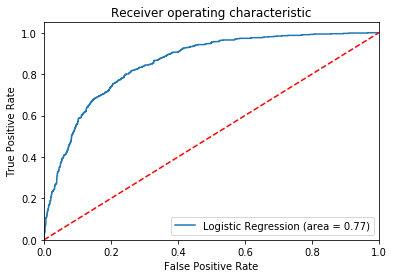

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_dummy))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_dummy)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()